# import

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
torch.manual_seed(1)

In [6]:
z = torch.FloatTensor([1,2,3])

In [8]:
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [10]:
hypothesis.sum()

tensor(1.)

In [12]:
z = torch.rand(3, 5, requires_grad=True)
hypothesis = F.softmax(z, dim=1)
print(hypothesis)

tensor([[0.1664, 0.1871, 0.1737, 0.2695, 0.2033],
        [0.2002, 0.1783, 0.2218, 0.1944, 0.2054],
        [0.1809, 0.2380, 0.2318, 0.1084, 0.2409]], grad_fn=<SoftmaxBackward>)


In [14]:
y = torch.randint(5,(3,)).long()
print(y)

tensor([3, 2, 3])


In [18]:
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1,y.unsqueeze(1),1)

tensor([[0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.]])

In [20]:
cost = (y_one_hot*-torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.6800, grad_fn=<MeanBackward1>)


In [22]:
x_train = torch.FloatTensor([[1,2,1],
                            [1,3,2],
                            [1,3,4],
                            [1,5,5],
                            [1,7,5],
                            [1,2,5],
                            [1,6,6],
                            [1,7,7]         
                            ])
y_train = torch.LongTensor([2,2,2,1,1,1,0,0])

In [25]:
x_test = torch.FloatTensor([[2,1,1],[3,1,2],[3,3,4]])
y_test = torch.LongTensor([2,2,2])

In [27]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3,3)
    def forward(self, x):
        return self.linear(x)

In [29]:
model = SoftmaxClassifierModel()

In [31]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [33]:
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):
        
        #H(x) 계산
        predictioin = model(x_train)
        
        #cost 계산
        cost = F.cross_entropy(prediction, y_train)
        
        #cost로 H(x)로 개선
        optimizer.zero_grad
        cost.backward()
        optimizer.step()
        
        print('Epoch')

# 데이터 선언

In [34]:
x_train = torch.FloatTensor([[73,80,75],
                             [93,88,93],
                             [89,91,90],
                             [96,98,100],
                             [73,66,70]])
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])

# 데이터 전처리

데이터 전처리( 표준편차는 1로 만든다. 그리고 입력값은 0~1사이로 지정한다.)

In [36]:
mu = x_train.mean(dim=0) #첫번째 세로줄을 의 평균을 구함 (X좌표의 평균을 구함)
sigma = x_train.std(dim=0) #표준편차를 구함
norm_x_train = (x_train - mu) / sigma
print(norm_x_train)

tensor([[-1.0674, -0.3758, -0.8398],
        [ 0.7418,  0.2778,  0.5863],
        [ 0.3799,  0.5229,  0.3486],
        [ 1.0132,  1.0948,  1.1409],
        [-1.0674, -1.5197, -1.2360]])


# 데이터 처리(정규화)

In [39]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3,1)
    
    def forward(self, x):
        return self.linear(x)

model = MultivariateLinearRegressionModel()
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [45]:
def train(model, optimizer, x_train, y_train):
    nb_epochs = 200
    for epoch in range(nb_epochs):
        
        #H(x) 계산
        prediction = model(x_train)
        
        #cost 계산
        cost = F.mse_loss(prediction, y_train)
        
        #cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

# 알고리즘 적용

In [47]:
train(model, optimizer, norm_x_train, y_train)

Epoch    0/200 Cost: 0.104585
Epoch    1/200 Cost: 0.104584
Epoch    2/200 Cost: 0.104585
Epoch    3/200 Cost: 0.104583
Epoch    4/200 Cost: 0.104584
Epoch    5/200 Cost: 0.104584
Epoch    6/200 Cost: 0.104584
Epoch    7/200 Cost: 0.104582
Epoch    8/200 Cost: 0.104583
Epoch    9/200 Cost: 0.104581
Epoch   10/200 Cost: 0.104582
Epoch   11/200 Cost: 0.104582
Epoch   12/200 Cost: 0.104582
Epoch   13/200 Cost: 0.104578
Epoch   14/200 Cost: 0.104583
Epoch   15/200 Cost: 0.104581
Epoch   16/200 Cost: 0.104581
Epoch   17/200 Cost: 0.104582
Epoch   18/200 Cost: 0.104580
Epoch   19/200 Cost: 0.104581
Epoch   20/200 Cost: 0.104581
Epoch   21/200 Cost: 0.104581
Epoch   22/200 Cost: 0.104579
Epoch   23/200 Cost: 0.104579
Epoch   24/200 Cost: 0.104580
Epoch   25/200 Cost: 0.104580
Epoch   26/200 Cost: 0.104579
Epoch   27/200 Cost: 0.104580
Epoch   28/200 Cost: 0.104580
Epoch   29/200 Cost: 0.104578
Epoch   30/200 Cost: 0.104578
Epoch   31/200 Cost: 0.104578
Epoch   32/200 Cost: 0.104577
Epoch   33

# Torchvision 설치법

In [2]:
import torchvision.datasets as dsets
print(torch.__version__)

1.1.0


Epoch:  0001 cost =  2.727510929
Accuracy:  0.7504000067710876
Epoch:  0002 cost =  1.114668369
Accuracy:  0.8131999969482422
Epoch:  0003 cost =  0.883005321
Accuracy:  0.8385000228881836
Epoch:  0004 cost =  0.768246233
Accuracy:  0.8463000059127808
Epoch:  0005 cost =  0.696319759
Accuracy:  0.8571000099182129
Epoch:  0006 cost =  0.645372570
Accuracy:  0.8618999719619751
Epoch:  0007 cost =  0.606003225
Accuracy:  0.8669999837875366
Epoch:  0008 cost =  0.575463653
Accuracy:  0.8702999949455261
Epoch:  0009 cost =  0.550106943
Accuracy:  0.8715999722480774
Epoch:  0010 cost =  0.529096007
Accuracy:  0.866100013256073
Epoch:  0011 cost =  0.511373639
Accuracy:  0.8697999715805054
Epoch:  0012 cost =  0.496011645
Accuracy:  0.8654000163078308
Epoch:  0013 cost =  0.481486380
Accuracy:  0.8689000010490417
Epoch:  0014 cost =  0.469515502
Accuracy:  0.8669000267982483
Epoch:  0015 cost =  0.459069341
Accuracy:  0.8700000047683716
Label :  8
Prediction:  8


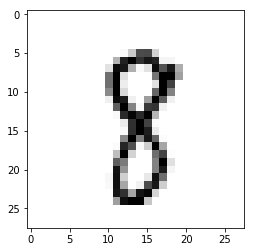

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import torchvision.datasets as dsets
from torchvision import transforms
import matplotlib.pyplot as plt
import random

mnist_train = dsets.MNIST(root="MNIST_data/", train=True, transform=transforms.ToTensor(),download=True)
mnist_test = dsets.MNIST(root="MNIST_data/", train=False, transform=transforms.ToTensor(),download=True)
#parameters
training_epochs = 15
batch_size = 100

data_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=batch_size,shuffle=True, drop_last=True)

# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True)
#initialization
torch.nn.init.normal_(linear.weight)


# define cost/Loss & optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # Label is not one-hot encoded
        X = X.view(-1,28 * 28)
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        avg_cost += cost/ total_batch
    print("Epoch: ", "%04d" %(epoch+1), "cost = ","{:.9f}".format(avg_cost))

    # Test the model using test sets
    with torch.no_grad():
        X_test = mnist_test.test_data.view(-1, 28*28).float()
        Y_test = mnist_test.test_labels
        
        prediction = linear(X_test)
        correct_prediction = torch.argmax(prediction, 1) == Y_test
        accuracy = correct_prediction.float().mean()
        print("Accuracy: ", accuracy.item())

r = random.randint(0, len(mnist_test)-1)
X_single_data = mnist_test.test_data[r:r+1].view(-1,28*28).float()
Y_single_data = mnist_test.test_labels[r:r+1]

print("Label : ", Y_single_data.item())
single_prediction = linear(X_single_data)
print("Prediction: ",torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r:r+1].view(28,28),cmap="Greys", interpolation="nearest")
plt.show()